# NPC Character movement analysis

In [106]:
%%sql --module=NPC_MOVE
 
select  max(npc_id) as npc_id,max(posX) as X,max(posZ) as Y
from (
  select event_dim.name as name
    ,if(event_dim.params.key = "npc_id",event_dim.params.value.string_value, null) as npc_id
    ,if(event_dim.params.key = "pos_X",event_dim.params.value.double_value, null) as posX
    ,if(event_dim.params.key = "pos_Z",event_dim.params.value.double_value, null) as posZ
    ,event_dim.timestamp_micros as ntime
  from  [terrycho-unitydemo:com_terry_unitydemo_ANDROID.app_events_20161101] 
  where event_dim.name = "NPC_MOVE"
  )
group by ntime,name

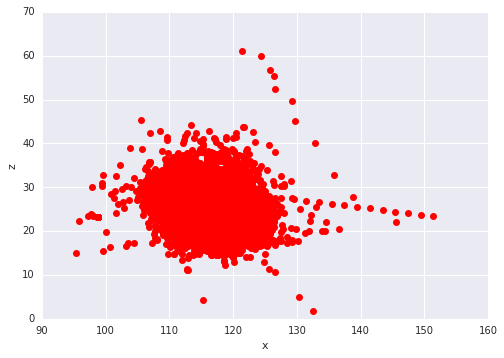

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import datalab.bigquery as bq

# 앞에서 빅쿼리에서 조회한 결과를 파이썬 객체로 저장한다. 
df = bq.Query(NPC_MOVE).to_dataframe()

# NPC의 이동 동선을 그래프로 표현
npc_x= df["X"]
npc_y= df["Y"]

plt.plot(npc_x,npc_y,'ro')
plt.xlabel('x')
plt.ylabel('z')




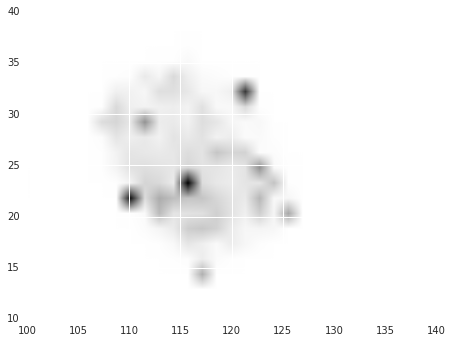

In [108]:
heatmap, xedges, yedges = np.histogram2d(npc_x, npc_y, bins=40)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.xlim([100,140])
plt.ylim([10,40])
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

# PLAYER ATTACK Location analysis

In [109]:
%%sql --module=PLAYER_ATTACK

select  name,max(posX) as X,max(posZ) as Y
from (
  select event_dim.name as name
    ,if(event_dim.params.key = "pos_X",event_dim.params.value.double_value, null) as posX
    ,if(event_dim.params.key = "pos_Z",event_dim.params.value.double_value, null) as posZ
    ,event_dim.timestamp_micros as ntime
  from  [terrycho-unitydemo:com_terry_unitydemo_ANDROID.app_events_20161101] 
  where event_dim.name = "PLAYER_ATTACK"
  )
group by ntime,name


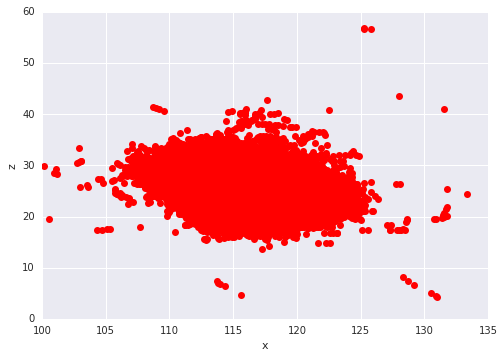

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import datalab.bigquery as bq

# 앞에서 빅쿼리에서 조회한 결과를 파이썬 객체로 저장한다. 
df = bq.Query(PLAYER_ATTACK).to_dataframe()

# NPC의 이동 동선을 그래프로 표현
attack_x= df["X"]
attack_y= df["Y"]

plt.plot(attack_x,attack_y,'ro')
plt.xlabel('x')
plt.ylabel('z')



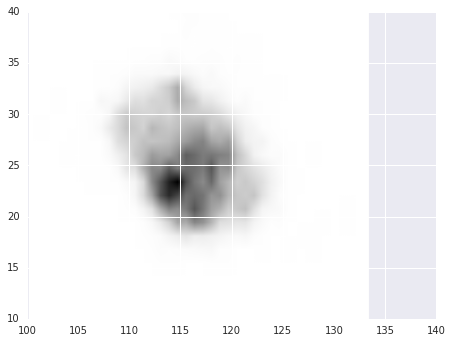

In [111]:
heatmap, xedges, yedges = np.histogram2d(attack_x, attack_y, bins=40)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.xlim([100,140])
plt.ylim([10,40])
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

# Highscore vs number of plays

In [112]:
%%sql
select  appInstanceId,count(appInstanceId) as numofplay,max(INTEGER(score)) as score
from (
  select 
    user_dim.app_info.app_instance_id  as appInstanceId,
    event_dim.name as name
    ,if(event_dim.params.key = "score",event_dim.params.value.string_value, null) as score
    ,event_dim.timestamp_micros as ntime
  from  [terrycho-unitydemo:com_terry_unitydemo_ANDROID.app_events_20161101] 
  #where event_dim.name = "PLAYER_ATTACK"
  )
where score is NOT null
group by appInstanceId
order by score desc
limit 100

appInstanceId,numofplay,score
30410e4fed91a49cc7d19867337ffc9c,23,4914
56123cd6e24823845e0699eec204420f,3,4597
af576c8be5417b65f390289e0e3f7fe5,4,4504
55d6e0a0856bc31af20aa1e4e6cd5481,13,4371
5f55e98c7b787422583ab0e303238feb,13,4327
e6c58bd6b10aca75c3da5f04f658a399,2,4215
e9c2d69c00948ef42f9d354b90da8f73,14,4118
d653c41e1bc442e67f5c102bb4de784d,5,4003
4a6226a0638675f297c0636f0c20d204,5,3963
7a87a0b2bad92d010420c9c2cf6c796e,4,3935


# Score per player's age

In [113]:
%%sql --module=SCORE

select appInstanceId,age,sex,score
from
(
  select  appInstanceId,max(age) as age,max(sex) as sex,max(INTEGER(score)) as score
  from (
    select 
      user_dim.app_info.app_instance_id  as appInstanceId,
      event_dim.name as name
      ,if(event_dim.params.key = "age",event_dim.params.value.string_value, null) as age
      ,if(event_dim.params.key = "score",event_dim.params.value.string_value, null) as score
      ,if(event_dim.params.key = "sex",event_dim.params.value.string_value, null) as sex
      ,event_dim.timestamp_micros as ntime
    from  [terrycho-unitydemo:com_terry_unitydemo_ANDROID.app_events_20161101] 
    )
  #where score is not null and age is not null
  #where score is not null
  group by appInstanceId
  order by score desc
)
where score is not null


48
[3645, 3258, 1838, 1454]
[4504, 4215, 3651, 3583, 3516, 3452, 3439, 3429, 3276, 2794, 2776]
[4914, 4003, 3935, 3928, 3790, 3767, 3470, 3370, 3318, 3270, 3254, 3230, 3021, 2993, 2910, 2887, 2454, 2207, 1272, 812, 565]
[4597, 4371, 4327, 4118, 3963, 3619, 3444, 3236, 3157, 3078, 2939, 2553]


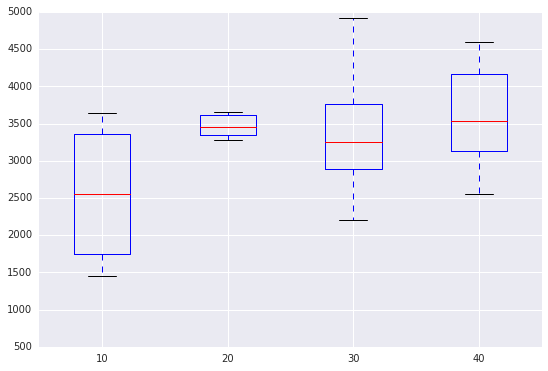

In [114]:
# 앞에서 빅쿼리에서 조회한 결과를 파이썬 객체로 저장한다. 
df = bq.Query(SCORE).to_dataframe()

age= df["age"]
score = df["score"]
score10 = []
score20 = []
score30 = []
score40 = []

print len(age)
for i in range(0,len(age)):
 myage = int(age[i])
 if(myage == 10):
  score10.append(score[i])
 else:
    if(myage == 20):
      score20.append(score[i])
    else:
      if(myage == 30):
        score30.append(score[i])
      else:
        if(myage == 40):
          score40.append(score[i])

print score10
print score20
print score30
print score40

myscore = [score10,score20,score30,score40]

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(myscore)

#plt.boxplot(myscore)
#plt.plot(age,score,'ro')
ax.set_xticklabels(['10', '20', '30', '40'])
#plt.xlabel('age')
#plt.ylabel('score')

# Player's ages

In [135]:
%%sql --module=AGE
select age,count(age) as users
  from (
    select 
      if(event_dim.params.key = "age",event_dim.params.value.string_value, null) as age
        from  [terrycho-unitydemo:com_terry_unitydemo_ANDROID.app_events_20161101] 
    )
where age is not null
group by age
order by age asc

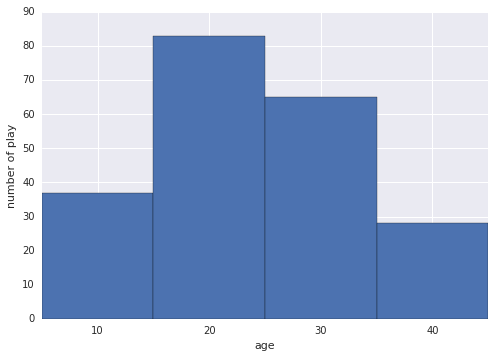

In [146]:
df = bq.Query(AGE).to_dataframe()
age = [10,20,30,40]
users= df["users"]

plt.bar(age,users,align='center',width=10)
plt.xticks([10,20,30,40])
plt.xlabel('age')
plt.ylabel('number of play')

# Average number of play per user by age

In [165]:
%%sql --module=AVERAGE_PLAY
select age,numberofplay,users,(numberofplay/users) as averageplay
from(
  select age,count(appInstanceId) as numberofplay,count(distinct(appInstanceId)) as users
    from (
      select 
        user_dim.app_info.app_instance_id  as appInstanceId,
        if(event_dim.params.key = "age",event_dim.params.value.string_value, null) as age
          from  [terrycho-unitydemo:com_terry_unitydemo_ANDROID.app_events_20161101] 
      )
  where age is not null
  group by age
)

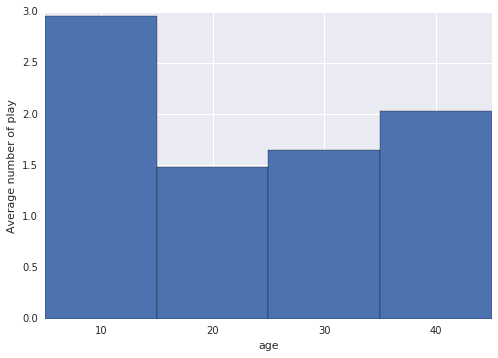

In [166]:
df = bq.Query(AVERAGE_PLAY).to_dataframe()
age = [10,20,30,40]
ap= df["averageplay"]

plt.bar(age,ap,align='center',width=10)
plt.xticks([10,20,30,40])
plt.xlabel('age')
plt.ylabel('Average number of play')